# EDA on Summer Olympics 1896-2012

<img src="https://raw.githubusercontent.com/lalitgarg12/EDA/master/Olympic-logo.png" width="480" height="720" align='left'><br/>

## Table of Contents

1. [History](#section1)<br>
2. [Problem Statement](#section2)<br>
3. [Importing Packages](#section3)<br>
4. [Loading Data](#section4)<br>
  - 4.1 [Description of the Datasets](#section401)<br>
  - 4.2 [Pandas Profiling before Data Preprocessing](#section402)<br>
5. [Data Preprocessing](#section5)<br>
  - 5.1 [Data Preprocessing](#section501)<br>
  - 5.2 [Pandas Profiling after Data Preprocessing](#section502)<br>
6. [Exploratory Data Analysis](#section6)<br>
  - 6.1  [Athletes with Highest Medals by Total Medals and Medal Types](#section601)<br>
  - 6.2  [Medal Distribution of Top 10 Countries](#section602)<br>
  - 6.3  [Medals by Top 10 Male and Female Athletes](#section603)<br>
  - 6.4  [Medal by Top Countries by Sport](#section604)<br>
  - 6.5  [Medal count of Top Countries by Years](#section605)<br>
  - 6.6  [Top 10 Most Popular Sports in Olympics](#section606)<br>
  - 6.7  [Year wise distribution of Gold, Silver and Bronze Medals](#section607)<br>
  - 6.8  [Contribution of different Medals by Their Types](#section608)<br>
  - 6.9  [Gender Distribution of Total Medals](#section609)<br>
  - 6.10 [City hosting maximum events and Medals by their types](#section610)<br>
  - 6.11 [Medal Distribution by Country on World Map](#section611)<br>
7. [Conclusion](#section7)<br>

<a id=section1></a>
## 1. History and facts about Olympics
- The modern Olympic Games or Olympics are leading international sporting events featuring summer and winter sports   
  competitions in which thousands of athletes from around the world participate in a variety of competitions. 
- The Olympic Games are held every four years, with the Summer and Winter Games alternating by occurring every four years but two years apart.
- Their creation was inspired by the ancient Olympic Games, which were held in Olympia, Greece, from the 8th century BC to the 4th century AD.
- Baron Pierre de Coubertin founded the International Olympic Committee (IOC) in 1894, leading to the first modern Games in Athens in 1896

<img src="https://raw.githubusercontent.com/budema6/INSAID/master/Athens-1896.jpg" width="480" height="720" align='center'><br/>

<a id=section2></a>
## 2. Problem Statement

__Olympic Games__ is the highest sporting event in the world where all the participants participate with their full spirit and try to compete with different __Gender, Nationality, Sports Events.__ We will figure out __how the different countries has been performing in the olympic games over the years__ and is there any relation with their __economic prosperity and the no. of medals won by that country.__

<a id=section3></a>
## 3. Importing Packages

In [116]:
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.set_option('display.precision', 3)               # To display values only upto three decimal places.
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

plt.style.use('fivethirtyeight')

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly import tools
init_notebook_mode(connected=True)

<a id=section4></a>
## 4. Loading Data

In this __Data Visualization__, we are using two datasets about __Summer Olympics.__

- __Summer Olympics Data Set:__ This dataset contains information about Year, City, Country Codes, Gender, Medal Types, Sports Events.
- __Countries GDP:__ This dataset contains information about Countries and their codes along with their population and GDP per capita.



### Importing 1st Dataset

In [117]:
# Importing 1st Dataset for Summer Olympics
summeroly_df = pd.read_csv('https://raw.githubusercontent.com/budema6/INSAID/master/SUMMEROLYMPICS.csv')
summeroly_df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


<a id=section401></a>
### 4.1 Description of the 1st Dataset

- This dataset contains information about __Year, City, Sport, Discipline, Athelete Name, Country, Gender, Event and Medal__.

| Column Name                    | Description                                                                                |
| -------------------------------|:------------------------------------------------------------------------------------------:| 
| Year                           | The Year in which Summer Olympics Held                                                     | 
| City                           | City Which hosted the Summer Olympic Event                                                 | 
| Sport                          | The Sport Name for Olympic Event                                                           | 
| Discipline                     | Name of Discipline on which sport belongs to                                               |
| Athelete                       | Name of Athelete Who has won the medal                                                     |
| Country                        | The Country Code which has won the medal                                                   |
| Gender                         | Male or Female Category                                                                    |
| Event                          | Name of Olympic Event                                                                      |
| Medal                          | Gold, Silver or Bronze Medals                                                              |
                                                                  

In [118]:
summeroly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
Year          31165 non-null int64
City          31165 non-null object
Sport         31165 non-null object
Discipline    31165 non-null object
Athlete       31165 non-null object
Country       31161 non-null object
Gender        31165 non-null object
Event         31165 non-null object
Medal         31165 non-null object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


- ```info``` function gives us the following insights into the summeroly_df dataframe:

  - There are a total of **31165 samples (rows)** and **9 columns** in the dataframe.
  
  - There are **1 column** with a **numeric** datatype and **8 columns** with an **object** datatype.
  
  - There are **4 missing** values in the data ( Country).

### Importing 2nd Dataset

In [119]:
# Importing 2nd Dataset for Countries and their codes
countriesgdp_df = pd.read_csv('https://raw.githubusercontent.com/budema6/INSAID/master/COUNTRYGDP.csv')
countriesgdp_df.head()

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,3.253e+07,594.323
1,Albania,ALB,2.889e+06,3945.218
2,Algeria,ALG,3.967e+07,4206.031
3,American Samoa*,ASA,5.554e+04,NaN
4,Andorra,AND,7.047e+04,NaN


### Description of the 2nd Dataset

- This dataset contains information about __Country, Code, Population and GDP Per Capita__.

| Column Name                    | Description                                                                                |
| -------------------------------|:------------------------------------------------------------------------------------------:| 
| Country                        | The Name of the Country                                                                    | 
| Code                           | The Country Code                                                                           | 
| Population                     | Population of Respective Country                                                           | 
| GDP Per Capita                 | Respective GDP of the Country                                                              |


In [120]:
countriesgdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 4 columns):
Country           201 non-null object
Code              201 non-null object
Population        196 non-null float64
GDP per Capita    176 non-null float64
dtypes: float64(2), object(2)
memory usage: 6.4+ KB


- ```info``` function gives us the following insights into the summeroly_df dataframe:

  - There are a total of **201 samples (rows)** and **4 columns** in the dataframe.
  
  - There are **2 column** with a **float** datatype and **2 columns** with an **object** datatype.
  
  - There are **missing** values in the Population and GDP per Capita Column.

- We are going to perform a **merge** on the **two dataframes**, **summeroly_df and countriesgdp_df** on the basis of **Code** column of **summeroly_df** dataframe and **countries** column of **countriesgdp_df** dataframe to create a new dataframe **summerolygdp_merge**, in order to make our **EDA** easier.

In [121]:
# Joining two dataframes on Codes and Countries by left join to have all records of summeroly_df
summerolygdp_merge=summeroly_df.merge(countriesgdp_df,left_on='Country',right_on='Code',how='left')
summerolygdp_merge.head()

,Year,City,Sport,Discipline,Athlete,Country_x,Gender,Event,Medal,Country_y,Code,Population,GDP per Capita
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary,HUN,9.845e+06,12363.543
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria,AUT,8.611e+06,43774.985
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece,GRE,1.082e+07,18002.231
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece,GRE,1.082e+07,18002.231
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece,GRE,1.082e+07,18002.231


In [122]:
summerolygdp_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31165 entries, 0 to 31164
Data columns (total 13 columns):
Year              31165 non-null int64
City              31165 non-null object
Sport             31165 non-null object
Discipline        31165 non-null object
Athlete           31165 non-null object
Country_x         31161 non-null object
Gender            31165 non-null object
Event             31165 non-null object
Medal             31165 non-null object
Country_y         25742 non-null object
Code              25742 non-null object
Population        25696 non-null float64
GDP per Capita    25142 non-null float64
dtypes: float64(2), int64(1), object(10)
memory usage: 3.3+ MB


- ```info``` function gives us the following insights into the summerolygdp_merge dataframe:

  - There are a total of **31165 samples (rows)** and **13 columns** in the dataframe.
  
  - There are **3 columns** with a **numeric** datatype and **10 columns** with an **object** datatype.
  
  - There are **missing** values in the **Country_x, Country_y, Population and GDP per Capita** column.

In [123]:
summerolygdp_merge.describe(include='all')

,Year,City,Sport,Discipline,Athlete,Country_x,Gender,Event,Medal,Country_y,Code,Population,GDP per Capita
count,31165.000,31165,31165,31165,31165,31161,31165,31165,31165,25742,25742,2.570e+04,25142.000
unique,NaN,22,43,67,22762,147,2,666,3,129,129,NaN,NaN
top,NaN,London,Aquatics,Athletics,"PHELPS, Michael",USA,Men,Football,Gold,United States,USA,NaN,NaN
freq,NaN,3567,4170,3638,22,4585,22746,1497,10486,4585,4585,NaN,NaN
mean,1970.483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.486e+08,36819.832
std,33.158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.672e+08,19545.023
min,1896.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.524e+04,277.068
25%,1948.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.139e+07,17118.504
50%,1980.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.080e+07,41313.314
75%,2000.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.441e+08,56115.718


- ```describe``` function gives us the following insights into the data:
  
  - __Top Athlete__ is Michael Phelps, __Top Discipline__ is Atheltics, __Top Sport__ is Aquatics, __London City__ has hosted maximum times of Olympics.
  - __USA__ has won the __MAXIMUM__ Medals in the Olympics.
  - __Men__ has more medals than __Women__.
  - __Country y, Code__ has more __missing__ values.

<a id=section402></a>
### 4.2 Pandas Profiling before Data Preprocessing

- Here, we will perform **Pandas Profiling before preprocessing** our dataset, so we will name the **output file** as __profiling_before_preprocessing.html__. 


- The file will be stored in the directory of our notebook. Open it using the jupyter notebook file explorer and take a look at it and see what insights you can develop from it. 


- Or we can **output the profiling report** in the **current jupyter notebook** as well as shown in the code below. 

In [124]:
import pandas_profiling

In [125]:
# To output pandas profiling report to an external html file.
# Saving the output as profiling_before_preprocessing.html
'''
profile = summerolygdp_merge.profile_report(title='Pandas Profiling before Data Preprocessing')
profile.to_file(output_file="profiling_before_preprocessing.html")
'''

# To output the pandas profiling report on the notebook.

summerolygdp_merge.profile_report(title='Pandas Profiling before Data Preprocessing', style={'full_width':True})

__Observations from Pandas Profiling before Data Preprocessing__ <br><br>

__DataSet Info__:
- Number of Variables: 13
- Number of Observations: 31165
- Missing Cells: 22342(5.5%)

__Variable types__:

- Numerical = 3
- Categorical = 10

<br>

- __Athlete, Code, Country_x, Country_y, Discipline, Event__ has high cardinality (Unique values)
- __GDP per Capita, Population__ has more missing values.
- __GDP__ varies significantly for different __Countries__ (Max: 101449, Min: 277)

- __Men__ has significantly high medals than __Women__ (Men: 22746, Women: 8419)
- __Medal__ Column shows only 3 types of Medals: __Gold, Silver and Bronze__ which are __equally distributed in numbers__.

- __Population__ also shows __significant variation__ in range which shows different countries (Small and Large) all participate in Olympics Games.

- __Sport__ Column shows the Top 2 Sports being __Aquatics__ and __Atheletics__ are most popular one among olympics.

- __Year__ Column shows the histogram pattern as the Year progresses, the no. of medals also increases as the no. of sports and people increased over period of time. Though there is __decline in 1920 to 1940__.

- __Positive Correlation__ is there between __GDP__ of the country and the no. of medals achieved by that country.


<a id=section5></a>
## 5. Data Preprocessing

<a id=section501></a>
### 5.1 Data Preprocessing

- Here we will perform **Data Preprocessing** on our dataset, to make the data usable for **EDA**.


- In order to avoid any errors, please run **Pandas Profiling** before running the code below.

In [126]:
summerolygdp_merge.head()

,Year,City,Sport,Discipline,Athlete,Country_x,Gender,Event,Medal,Country_y,Code,Population,GDP_per_Capita
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary,HUN,9.845e+06,12363.543
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria,AUT,8.611e+06,43774.985
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece,GRE,1.082e+07,18002.231
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece,GRE,1.082e+07,18002.231
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece,GRE,1.082e+07,18002.231


- Since Columns __Population__ and __GDP per Capita__ has __missing values__, its better to drop of these columns.
- Also, the names of __Athelete__ are not proper, we will use __str__ function to correct it.
- There are 4 missing values in __Country_x__ also, so we will identify all such blank row records and remove them.
- __Renaming__ the column __Country_x__ to __Code__ and __renaming__ the column __Country_y__ to __Country.

In [127]:
summerolygdp_merge.drop(['Population','GDP_per_Capita','Code'],1,inplace=True)

In [128]:
summerolygdp_merge.head()

,Year,City,Sport,Discipline,Athlete,Country_x,Gender,Event,Medal,Country_y
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece


In [129]:
#Renaming Columns
summerolygdp_merge.columns=[['Year','City','Sport','Discipline','Athlete','Code','Gender','Event','Medal','Country']]

In [130]:
summerolygdp_merge.head(2)

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria


In [131]:
#Dealing with missing values
total = summerolygdp_merge.isnull().sum().sort_values(ascending=False)
percent = (summerolygdp_merge.isnull().sum()/summerolygdp_merge.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

            Total    Percent
Country     5423   1.740e-01
Code        4      1.283e-04
Medal       0      0.000e+00
Event       0      0.000e+00
Gender      0      0.000e+00
Athlete     0      0.000e+00
Discipline  0      0.000e+00
Sport       0      0.000e+00
City        0      0.000e+00
Year        0      0.000e+00


In [132]:
#Dropping Country Columns also. Since country codes are good enough.
summerolygdp_merge.drop(['Country'],1,inplace=True)


In [133]:
#Deleting 4 missing values from Code
summerolygdp_merge.columns
#summerolygdp_merge.Code.isnull().sort_values(ascending=False)


MultiIndex(levels=[['Athlete', 'City', 'Code', 'Country', 'Discipline', 'Event', 'Gender', 'Medal', 'Sport', 'Year']],
           codes=[[9, 1, 8, 4, 0, 2, 6, 5, 7]])

In [134]:
summerolygdp_merge.head(10)

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
5,1896,Athens,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,1200M Freestyle,Bronze
6,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold
7,1896,Athens,Aquatics,Swimming,"ANDREOU, Joannis",GRE,Men,1200M Freestyle,Silver
8,1896,Athens,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,400M Freestyle,Bronze
9,1896,Athens,Aquatics,Swimming,"NEUMANN, Paul",AUT,Men,400M Freestyle,Gold


In [135]:
summeroly_df = pd.read_csv('https://raw.githubusercontent.com/budema6/INSAID/master/SUMMEROLYMPICS.csv')

In [136]:
#Dealing with missing value, to find null values
total = summeroly_df.isnull().sum().sort_values(ascending=False)
percent = (summeroly_df.isnull().sum()/summerolygdp_merge.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

               Total  Percent
Athlete        0.0   NaN     
City           0.0   NaN     
Country        4.0   NaN     
Discipline     0.0   NaN     
Event          0.0   NaN     
Gender         0.0   NaN     
Medal          0.0   NaN     
Sport          0.0   NaN     
Year           0.0   NaN     
(Athlete,)    NaN    NaN     
(City,)       NaN    NaN     
(Code,)       NaN    NaN     
(Discipline,) NaN    NaN     
(Event,)      NaN    NaN     
(Gender,)     NaN    NaN     
(Medal,)      NaN    NaN     
(Sport,)      NaN    NaN     
(Year,)       NaN    NaN     


In [137]:
#Identifying the missing values in Country Descending order wise
summeroly_df.Country.isnull().sort_values(ascending=False)

31072    True 
31110    True 
31091    True 
29603    True 
10387    False
10386    False
10385    False
10384    False
10383    False
10382    False
10389    False
10381    False
10380    False
10379    False
10378    False
10377    False
10388    False
31164    False
10376    False
10391    False
10392    False
10393    False
10394    False
10395    False
10396    False
10397    False
10398    False
10399    False
10400    False
10401    False
         ...  
20782    False
20754    False
20767    False
20755    False
20756    False
20757    False
20758    False
20759    False
20760    False
20761    False
20762    False
20763    False
20764    False
20765    False
20766    False
20768    False
20781    False
20769    False
20770    False
20771    False
20772    False
20773    False
20774    False
20775    False
20776    False
20777    False
20778    False
20779    False
20780    False
0        False
Name: Country, Length: 31165, dtype: bool

In [138]:
#Dropping missing rows from Country
summeroly_df.loc[[31072,31110,31091,29603],"Country"]

31072    NaN
31110    NaN
31091    NaN
29603    NaN
Name: Country, dtype: object

In [139]:
summeroly_df.drop([31072,31110,31091,29603],axis=0,inplace=True)

In [140]:
summeroly_df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [141]:
summeroly_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31161 entries, 0 to 31164
Data columns (total 9 columns):
Year          31161 non-null int64
City          31161 non-null object
Sport         31161 non-null object
Discipline    31161 non-null object
Athlete       31161 non-null object
Country       31161 non-null object
Gender        31161 non-null object
Event         31161 non-null object
Medal         31161 non-null object
dtypes: int64(1), object(8)
memory usage: 2.4+ MB


<a id=section502></a>
### 5.2 Data after Preprocessing

__DateSet Info__

- No. of Variables: 9
- No. of Observations: 31161
- No. of Missing Values: 0

In [142]:
#Correcting the Athelete Names by removing commas and proper name.
summeroly_df['Athlete']=summeroly_df['Athlete'].str.split(', ').str[::-1].str.join(' ')
summeroly_df['Athlete']=summeroly_df['Athlete'].str.title()

In [143]:
summeroly_df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,Otto Herschmann,AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,Dimitrios Drivas,GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,Spiridon Chasapis,GRE,Men,100M Freestyle For Sailors,Silver


<a id=section6></a>
## 6. Exploratory Data Analysis

**Exploratory Data Analysis(EDA)** is an **approach to analyzing data sets** to **summarize** their **main characteristics**, often with **visual methods**. 


- It includes **cleaning, munging, combining, reshaping, slicing, dicing, and transforming data** for **analysis** purpose.


- The **primary goal of EDA** is to **maximize the analyst's insight into a data set** and into the **underlying structure of a data set**, while **providing all of the specific items** that an **analyst would want to extract from a data set**, such as:
 <br><br> 
  - A list of **outliers**.<br><br>
  
  - A **good-fitting, parsimonious model**.  <br><br>
  
  - **Estimates for parameters**.<br><br>
  
  - **Uncertainties** for those **estimates**.<br><br>
  
  - A **ranked list** of **important factors**.<br><br>
  
  - **Conclusions** as to whether **individual factors are statistically significant**.<br><br>
  
  - A **sense of robustness of conclusions**.<br><br>
  
  - **Optimal settings**.<br><br>

<a id=section601></a>
### 6.1 Athletes with Highest Medals by Total Medals and Medal Types

In [144]:
#Finding the Highest Decorated Male and Female Athelete
print('The Highest Decorated Male Athlete is: ',summeroly_df[summeroly_df['Gender']=='Men']['Athlete'].value_counts()[:1].index[0],'with: ',summeroly_df[summeroly_df['Gender']=='Men']['Athlete'].value_counts()[:1].values[0],' medals')
print('The Highest Decorated Female Athlete is: ',summeroly_df[summeroly_df['Gender']=='Women']['Athlete'].value_counts()[:1].index[0],'with: ',summeroly_df[summeroly_df['Gender']=='Women']['Athlete'].value_counts()[:1].values[0],' medals')

The Highest Decorated Male Athlete is:  Michael Phelps with:  22  medals
The Highest Decorated Female Athlete is:  Larisa Latynina with:  18  medals


In [145]:
medals=summeroly_df.groupby(['Athlete','Medal'])['Sport'].count().reset_index().sort_values(by='Sport',ascending=False)
medals=medals.drop_duplicates(subset=['Medal'],keep='first')
medals.columns=[['Athlete','Medal','Count']]
medals

,Athlete,Medal,Count
17343,Michael Phelps,Gold,18
587,Aleksandr Dityatin,Silver,6
9797,Heikki Savolainen,Bronze,6


<a id=section602></a>
### 6.2 Medal Distribution of Top 10 Countries

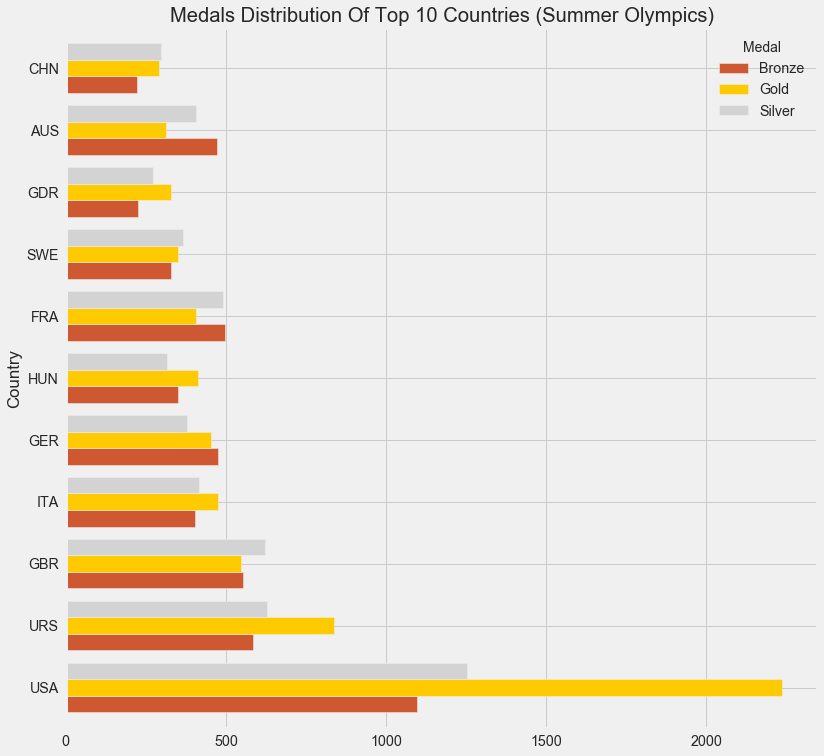

In [146]:
medals_country=summeroly_df.groupby(['Country','Medal'])['Gender'].count().reset_index().sort_values(by='Gender',ascending=False)
medals_country=medals_country.pivot('Country','Medal','Gender').fillna(0)
top=medals_country.sort_values(by='Gold',ascending=False)[:11]
top.plot.barh(width=0.8,color=['#CD5832','#FFCA00','#D3D3D3'])
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.title('Medals Distribution Of Top 10 Countries (Summer Olympics)')
plt.show()

- Here we can see the Top 3 countries are __USA, URS and GBR__ for the number of Medals.

<a id=section603></a>
### 6.3 Medals by Top Male and Female Athletes

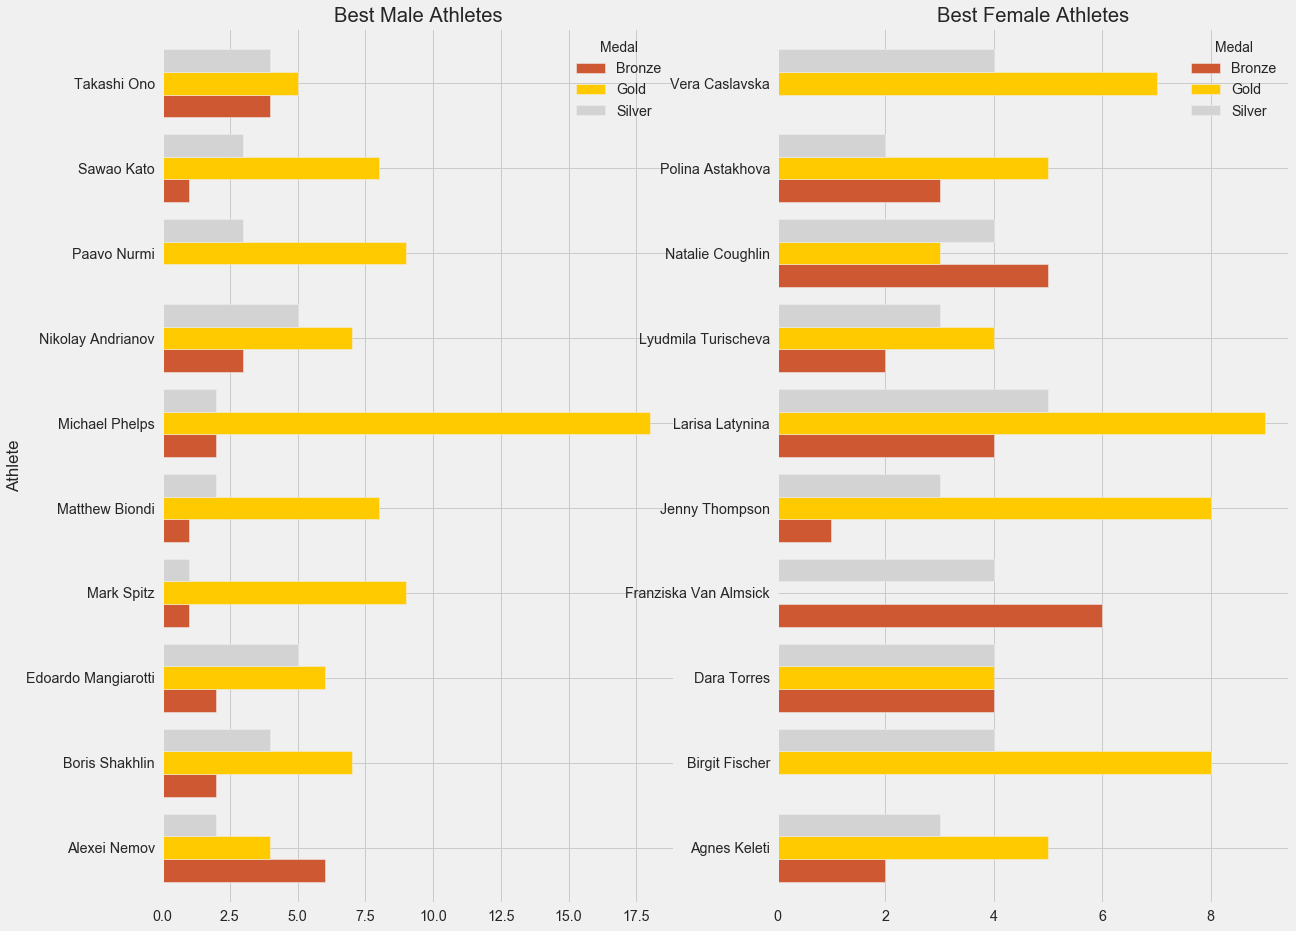

In [147]:
fig,ax=plt.subplots(1,2,figsize=(18,15))

men=summeroly_df[summeroly_df['Gender']=='Men']
men=men.groupby(['Athlete','Medal'])['Country'].count().reset_index().sort_values(by='Country',ascending=False)
men=men[men['Athlete'].isin(summeroly_df['Athlete'].value_counts().index[:15])]
men=men.pivot('Athlete','Medal','Country')
men.plot.barh(width=0.8,color=['#CD5832','#FFCA00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Best Male Athletes')
ax[0].set_ylabel('Athlete')

women=summeroly_df[summeroly_df['Gender']=='Women']
women=women.groupby(['Athlete','Medal'])['Country'].count().reset_index().sort_values(by='Country',ascending=False)
women=women[women['Athlete'].isin(summeroly_df['Athlete'].value_counts().index[:30])]
women=women.pivot('Athlete','Medal','Country')
women.plot.barh(width=0.8,color=['#CD5832','#FFCA00','#D3D3D3'],ax=ax[1])
ax[1].set_title('Best Female Athletes')
ax[1].set_ylabel('')
plt.show()

- Here we can see the __TOP MALE__ ATHLETE IS __"MICHAEL PHELPS"__ and __TOP FEMALE__ ATHLETE IS __"LARISA LATYNINA"__

<a id=section604></a>
### 6.4 Medals by Top Countries by Sport

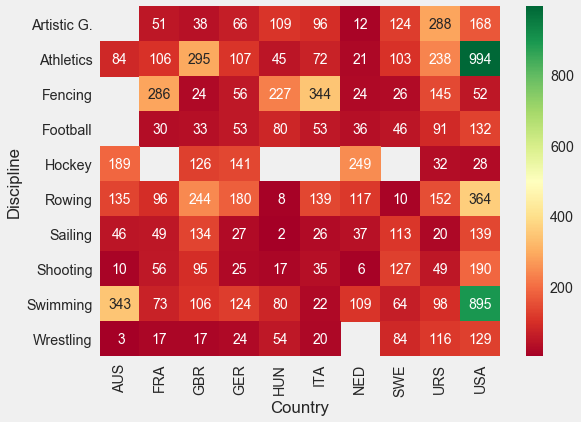

In [148]:
summeroly_df.loc[summeroly_df['Discipline'].str.contains('Wrestling'),'Discipline']='Wrestling'
summeroly_df.loc[summeroly_df['Discipline'].str.contains('Weightlifting'),'Discipline']='Weightlifting'
test=summeroly_df[summeroly_df['Country'].isin(summer_df['Country'].value_counts()[:10].index)]
test=test[test['Discipline'].isin(summer_df['Discipline'].value_counts()[:10].index)]
test=test.groupby(['Country','Discipline'])['Sport'].count().reset_index()
test=test.pivot('Discipline','Country','Sport')
sns.heatmap(test,cmap='RdYlGn',annot=True,fmt='2.0f')
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

- Here we are showing the Discipline wise distribution of Medals for each country.
- We can see __USA__ has __Maximum__ Medals in __Athletics__ Event,

<a id=section605></a>
### 6.5 Medal Count of Top Countries by Years

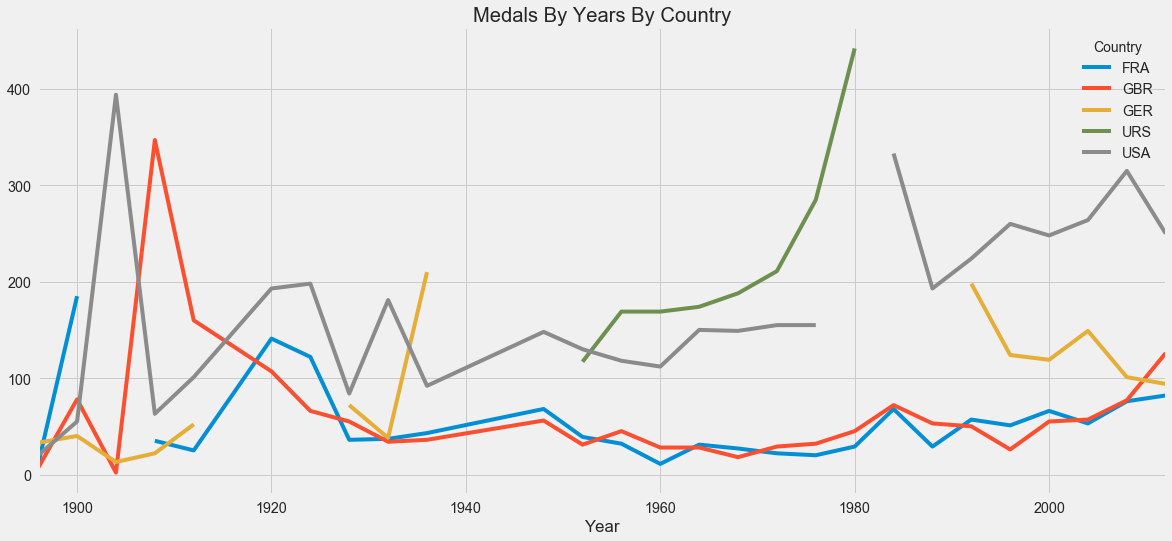

In [149]:
test1=summeroly_df.groupby(['Country','Year'])['Medal'].count().reset_index()
test1=test1[test1['Country'].isin(summeroly_df['Country'].value_counts()[:5].index)]
test1=test1.pivot('Year','Country','Medal')
test1.plot()
fig=plt.gcf()
fig.set_size_inches(18,8)
plt.title('Medals By Years By Country')
plt.show()

- Here we can see the __Year wise__ trend of __Medal Distribution__ for different __Countries__
- We can see the consistency in the performance of __France and Russia__ from 1940 onwards.

<a id=section606></a>
### 6.6 Top 10 Most Popular Sports in Summer Olympics

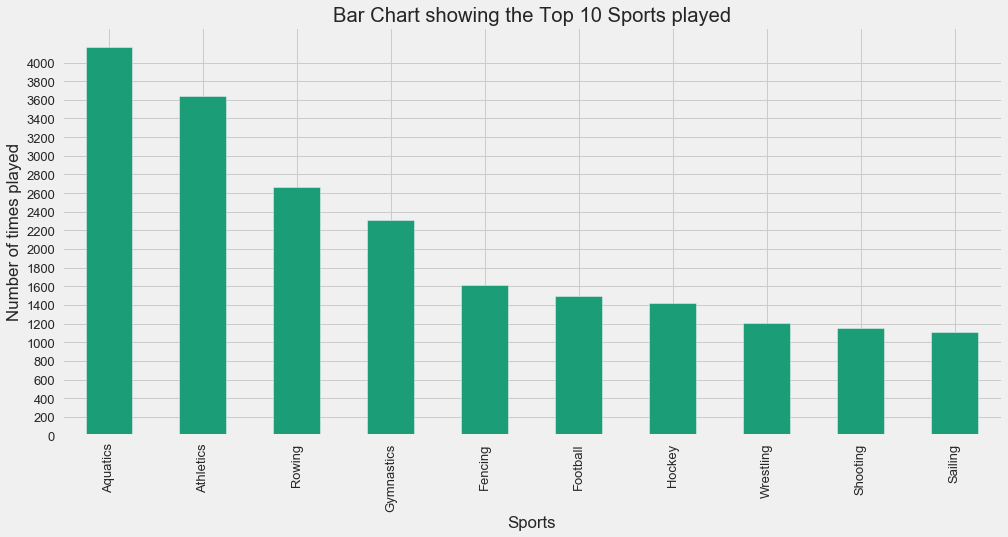

In [150]:
#Top 10 Sports to be played in Olympics
summeroly_df['Sport'].value_counts().head(10)
summeroly_df['Sport'].value_counts().head(10).plot.bar(figsize=(15,7), colormap='Dark2', fontsize=13, yticks=np.arange(0, 4200, 200))
plt.xlabel('Sports')
plt.ylabel('Number of times played')
plt.title('Bar Chart showing the Top 10 Sports played')
plt.show()


- Here we can see the __TOP 10__ Sports events which has won most __Medals__
- We can see the __Acquatics and Athletics__ are the Top 2 most popular sports.

<a id=section607></a>
### 6.7 Year wise Distribution of Gold, Silver and Bronze Medals

In [151]:
#Line graph for all Gold, Silver and Bronze Medals over the years from 1896 to 2012
gold_df = summeroly_df[summeroly_df['Medal']=='Gold']
silver_df = summeroly_df[summeroly_df['Medal']=='Silver']
bronze_df = summeroly_df[summeroly_df['Medal']=='Bronze']
by_gold = gold_df.groupby(['Year']).count()['Medal']
by_silver = silver_df.groupby(['Year']).count()['Medal']
by_bronze = bronze_df.groupby(['Year']).count()['Medal']

Medal_Merge = pd.concat([by_gold,by_silver,by_bronze],axis=1)

Medal_Merge.columns = ['Gold_Medal', 'Silver_Medal', 'Bronze_Medal']

Medal_Merge

,Gold_Medal,Silver_Medal,Bronze_Medal
Year,,,
1896,64,47,40
1900,178,192,142
1904,188,159,123
1908,311,282,211
1912,301,300,284
1920,497,446,355
1924,301,298,285
1928,229,239,242
1932,213,206,196


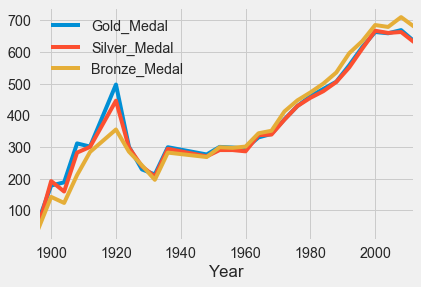

In [152]:
Medal_Merge.plot(kind='line')
plt.show()

- Showing Year wise distribution of all medals and we can see the no. of medals increasing significantly from 1900 to 2000

<a id=section608></a>
### 6.8 Contribution of different Medals by their types

Text(0.5, 1.0, 'Donut Plot showing the proportion of each Medal Type')

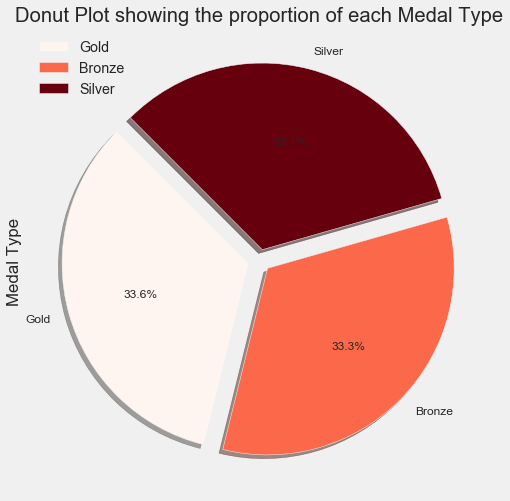

In [153]:
summeroly_df['Medal'].value_counts().plot(kind='pie', explode=[0.06,0.06,0.06], fontsize=12, autopct='%3.1f%%', 
                                               figsize=(8,8), shadow=True, startangle=135, legend=True, cmap='Reds')

plt.ylabel('Medal Type')
plt.title('Donut Plot showing the proportion of each Medal Type')


- Here we can see the distribution of types of Medals and all medals are equally distributed.

<a id=section609></a>
### 6.9 Gender Distribution of Total Medals

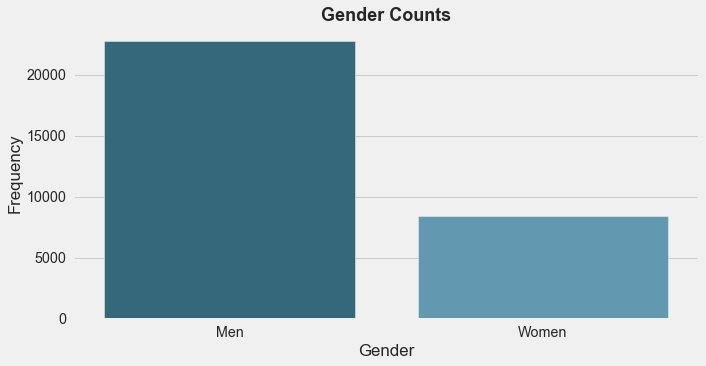

In [154]:
# 1.5 Gender wise distribution only
plt.figure(figsize=(10,5))
sns.countplot('Gender',data = summeroly_df, order = summeroly_df['Gender'].value_counts().index,palette="PuBuGn_d")
plt.title("Gender Counts",fontsize=18,fontweight="bold")
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

- Here we can clearly the __Men__ are leading in __Medals Tally__ than __Women__

<a id=section610></a>
### 6.10 City that hosted maximum Olympic Events and Medals Distribution by their types

In [155]:
London_silver = silver_df.groupby(['Year','City']).count().xs('London',level='City').loc[:,'Medal'].sort_values(ascending=False)
London_gold = gold_df.groupby(['Year','City']).count().xs('London',level='City').loc[:,'Medal'].sort_values(ascending=False)
London_Bronze = bronze_df.groupby(['Year','City']).count().xs('London',level='City').loc[:,'Medal'].sort_values(ascending=False)

London_Merge= pd.concat([London_gold,London_silver, London_Bronze],axis=1)

London_Merge.columns = ['Gold_Medal', 'Silver_Medal', 'Bronze_Medal']

London_Merge

,Gold_Medal,Silver_Medal,Bronze_Medal
Year,,,
1908,311,282,211
1948,276,270,268
2012,634,631,680


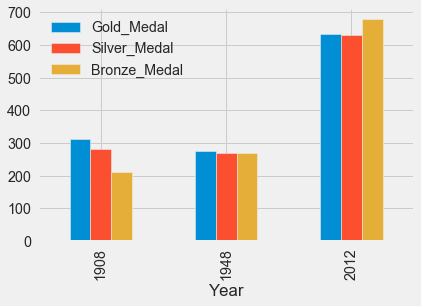

In [156]:
London_Merge.plot.bar()
plt.show()

- Here we can see that __London City__ has hosted the Olympics maximum times and __2012__ is significantly high than __1908__

<a id=section611></a>
### 6.11 Medal Distribution by Country on World Map

In [157]:
summer_excel = pd.read_csv('https://raw.githubusercontent.com/budema6/INSAID/master/SUMMEROLYMPICS.csv')
medals_map=summer_excel.groupby(['City','Country'])['Medal'].count().reset_index()
medals_map.head()

,City,Country,Medal
0,Amsterdam,ARG,32
1,Amsterdam,AUS,4
2,Amsterdam,AUT,4
3,Amsterdam,BEL,5
4,Amsterdam,CAN,33


In [158]:
medals_map.sort_values(by='Medal', ascending=False).head(20)

,City,Country,Medal
466,London,GBR,529
582,Los Angeles,USA,514
525,London,USA,461
741,Moscow,URS,442
930,St Louis,USA,394
353,Beijing,USA,315
804,Paris,FRA,307
919,Seoul,URS,294
705,Montreal,URS,285
124,Athens,USA,284


In [159]:
# Creating the data object.
# This object is used to specify the data to be plotted and its properties.
# In plotly, the data object must be a list object hence its enclosed in [].
# Here we are plotting the mean final weight value of each country on the map, which is set using the z parameter in data.
# The locations to be plotted are specified using the location parameter in data.

data = [go.Choropleth(colorscale='Viridis', autocolorscale=False, locations=medals_map['Country'], 
                      locationmode='country names', z=medals_map['Medal'], 
                      text=medals_map['Country'].unique(), colorbar=go.choropleth.ColorBar(title='Medals'), 
                      marker=go.choropleth.Marker(line=go.choropleth.marker.Line(color='rgb(200,200,200)', width=0.5)))]

In [160]:
# Creating the layout object.
# This object is used to set the layout of the plot (here we are setting the title of the plot).

layout = go.Layout(title=go.layout.Title(text='Total Medals By Country Summer Olympics'))

In [161]:
# Creating the fig object from the data and layout objects.

fig = go.Figure(data=data, layout=layout)

In [162]:
# Plotting the data onto a world map.

iplot(fig, filename='d3-cloropleth-map')

- Here we can see visually in the graphics that __USA__ is the __Highest Medal__ Country with __Total Medals 4585__
- Other countries like __Africa, Antarctica__ has been the __lowest Medal Winner__ as per the graph.

In [163]:
countriesgdp_df.sort_values(by='GDP per Capita', ascending = False).head(20)

,Country,Code,Population,GDP per Capita
108,Luxembourg,LUX,5.697e+05,101449.968
175,Switzerland,SUI,8.287e+06,80945.079
135,Norway,NOR,5.196e+06,74400.370
148,Qatar,QAT,2.235e+06,73653.394
88,Ireland,IRL,4.641e+06,61133.672
10,Australia,AUS,2.378e+07,56310.963
191,United States,USA,3.214e+08,56115.718
163,Singapore,SIN,5.535e+06,52888.745
52,Denmark,DEN,5.676e+06,51989.293
174,Sweden,SWE,9.799e+06,50579.674


<a id=section7></a>
## 7. Conclusion

- The first modern Olympics were held in __Athens, Greece, in 1896__. In the opening ceremony, King Georgios I and a crowd of 60,000 spectators welcomed __280 participants__ from __13 nations (all male)__, who would compete in __43 events__, including track and field, gymnastics, swimming, wrestling, cycling, tennis, weightlifting, shooting and fencing. All subsequent Olympiads have been numbered even when no Games take place (as in 1916, during World War I, and in 1940 and 1944, during World War II).


- The Olympics truly took off as an international sporting event after 1924, when the VIII Games were held in Paris. Some __3,000 athletes (with more than 100 women among them) from 44 nations competed that year__, and for the first time the Games featured a closing ceremony.


- Eighty years later, when the __2004 Summer Olympics returned to Athens__ for the first time in more than a century, nearly __11,000 athletes__ from a record __201 countries__ competed. 


- In This Analysis, we can see the __trend and rise of Modern Olympics__ in more than __100 years history__ and how the popularity of olympics has made them one of the __favourite games of every sports person__ in the every corner of the world.


- The __GDP of the country__ and __Medals count correlation__ is quite __high as higher the GDP of the country, higher the number of medals__.


- __Male Atheletes__ are more than __Women Athletes__ but the no. of women also increases over period of time as compared to Men.